## Problem Statement
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

**Approach:** The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

**Results:** You have to build a solution that should able to predict the probability of credit
default based on credit card owner’s characteristics and payment history.

In [58]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from imblearn.over_sampling import RandomOverSampler

In [4]:
# Import dataset
credit_card_df = pd.read_csv("UCI_Credit_Card.csv")
# Head
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Tail
credit_card_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [6]:
# Shape
credit_card_df.shape

(30000, 25)

In [7]:
# Describle
credit_card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# Info
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:

# copy 'original' dataframe to 'df' column
df = credit_card_df.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Figure size 2000x1500 with 0 Axes>

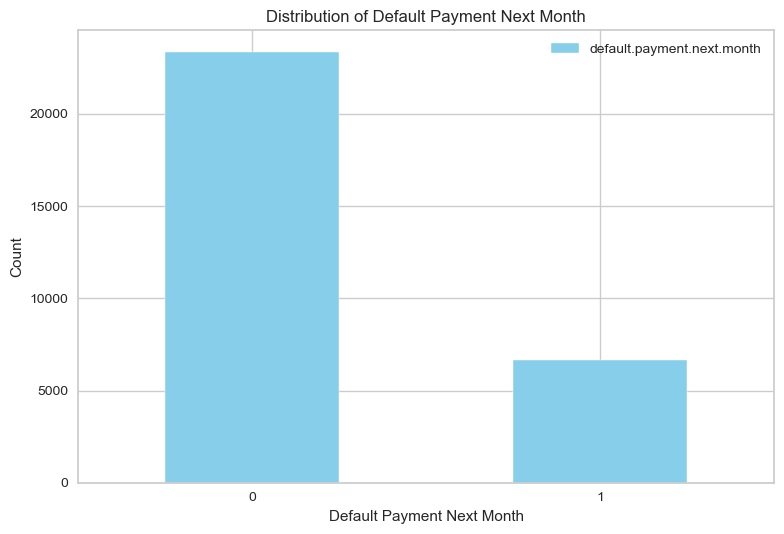

In [10]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Subplot for Distribution of the target variable
colors = ['skyblue', 'coral']
pd.DataFrame(df['default.payment.next.month'].value_counts()).plot(kind='bar', color=colors)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()


- 1: Yes (The client will default next month)
- 2: No (The client will not default next month)

<Figure size 2000x1500 with 0 Axes>

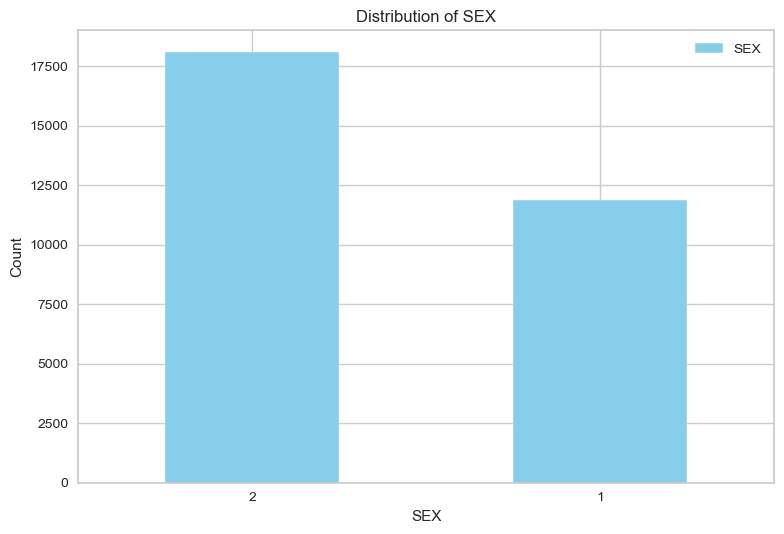

In [11]:

sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Subplot for Distribution of SEX
colors_sex = ['skyblue', 'coral']
pd.DataFrame(df['SEX'].value_counts()).plot(kind='bar', color=colors_sex)
plt.title('Distribution of SEX')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.xticks(rotation=360)


plt.tight_layout()
plt.show()

- 1: Male
- 2: Female

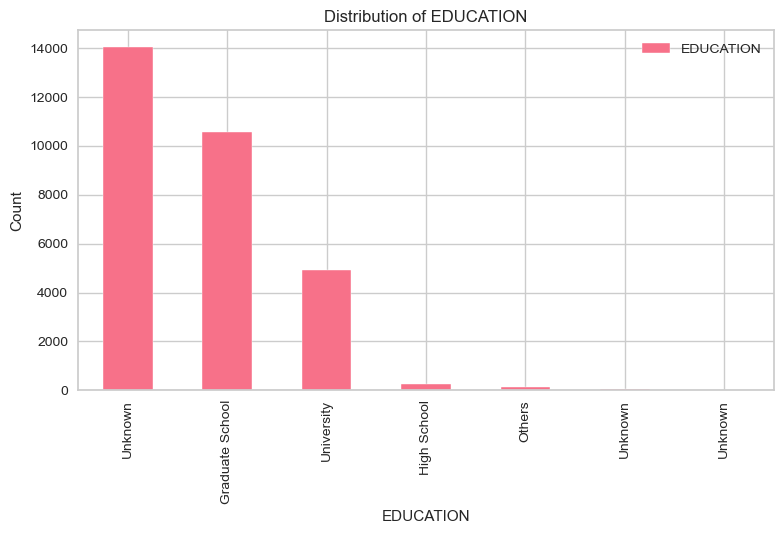

In [12]:
# Subplot for Distribution of EDUCATION
colors_education = sns.color_palette("husl", n_colors=df['EDUCATION'].nunique())
pd.DataFrame(df['EDUCATION'].value_counts()).plot(kind='bar', color=colors_education)
plt.title('Distribution of EDUCATION')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Unknown","Graduate School","University","High School","Others","Unknown","Unknown"])
plt.tight_layout()
plt.show()

The EDUCATION column in the UCI Credit Card dataset represents the education level of the clients. The values in this column are encoded as integers, which correspond to different education levels. Here's a breakdown of what each value typically means:

- 1: Graduate school
- 2: University
- 3: High school
- 4: Others
- 5, 6, 0: These labels are not explicitly defined in the original dataset, but they could represent other education levels or categories not specified.

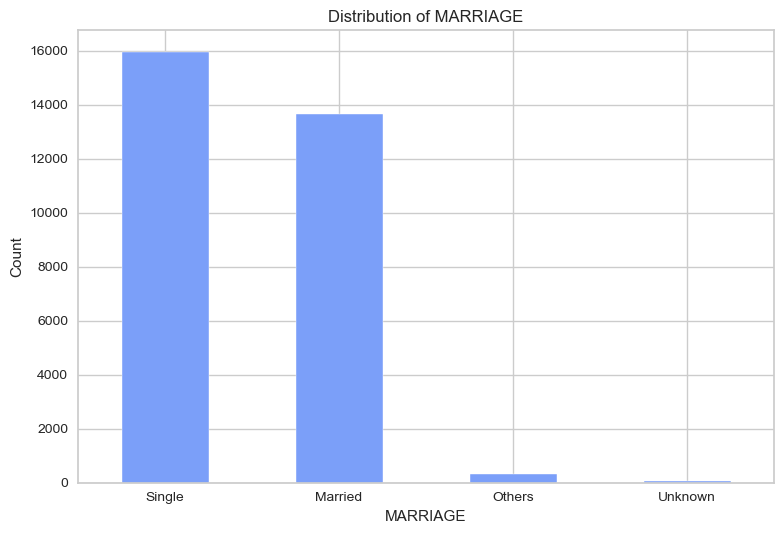

In [13]:

# Subplot for Distribution of MARRIAGE
# Adapting the code to use the "coolwarm" color palette for the distribution of the MARRIAGE column
colors_marriage_coolwarm = sns.color_palette("coolwarm", n_colors=df['MARRIAGE'].nunique())
pd.DataFrame(df['MARRIAGE'].value_counts()).plot(kind='bar', color=colors_marriage_coolwarm, legend=False)
plt.title('Distribution of MARRIAGE')
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2,3], labels=["Single","Married","Others","Unknown"], rotation=360)
plt.tight_layout()
plt.show()


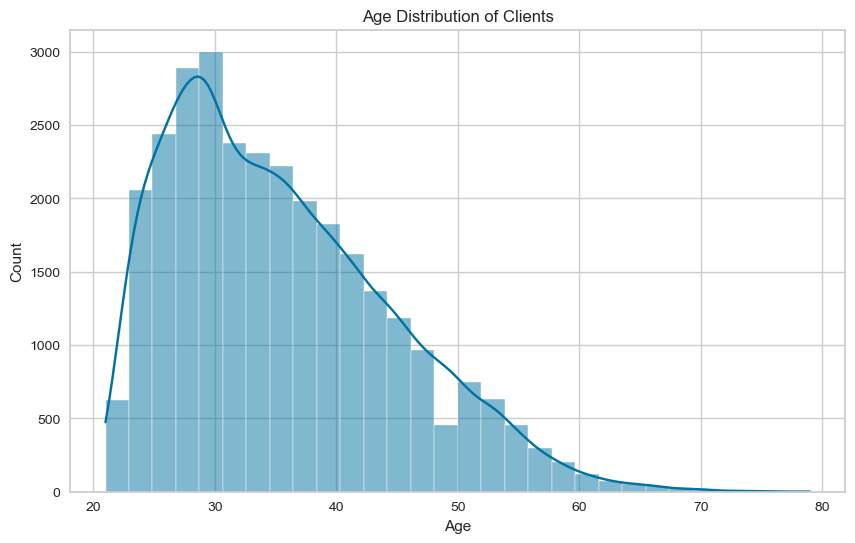

In [14]:
# Visualizing the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [15]:
# Create total columns
df['TOTAL_BILL_AMT'] = df['BILL_AMT1'] + df['BILL_AMT2'] +  df['BILL_AMT3'] + df['BILL_AMT4']+ df['BILL_AMT5'] + df['BILL_AMT6']
df['TOTAL_PAY_AMT']  = df['PAY_AMT1']  + df['PAY_AMT2']  + df['PAY_AMT3']  + df['PAY_AMT4']  + df['PAY_AMT5']  + df['PAY_AMT6'] 
df['UTILIZATION_RATIO'] = df['TOTAL_BILL_AMT'] / df['LIMIT_BAL']
df['UTILIZATION_RATIO'] = df['UTILIZATION_RATIO'].round(2)


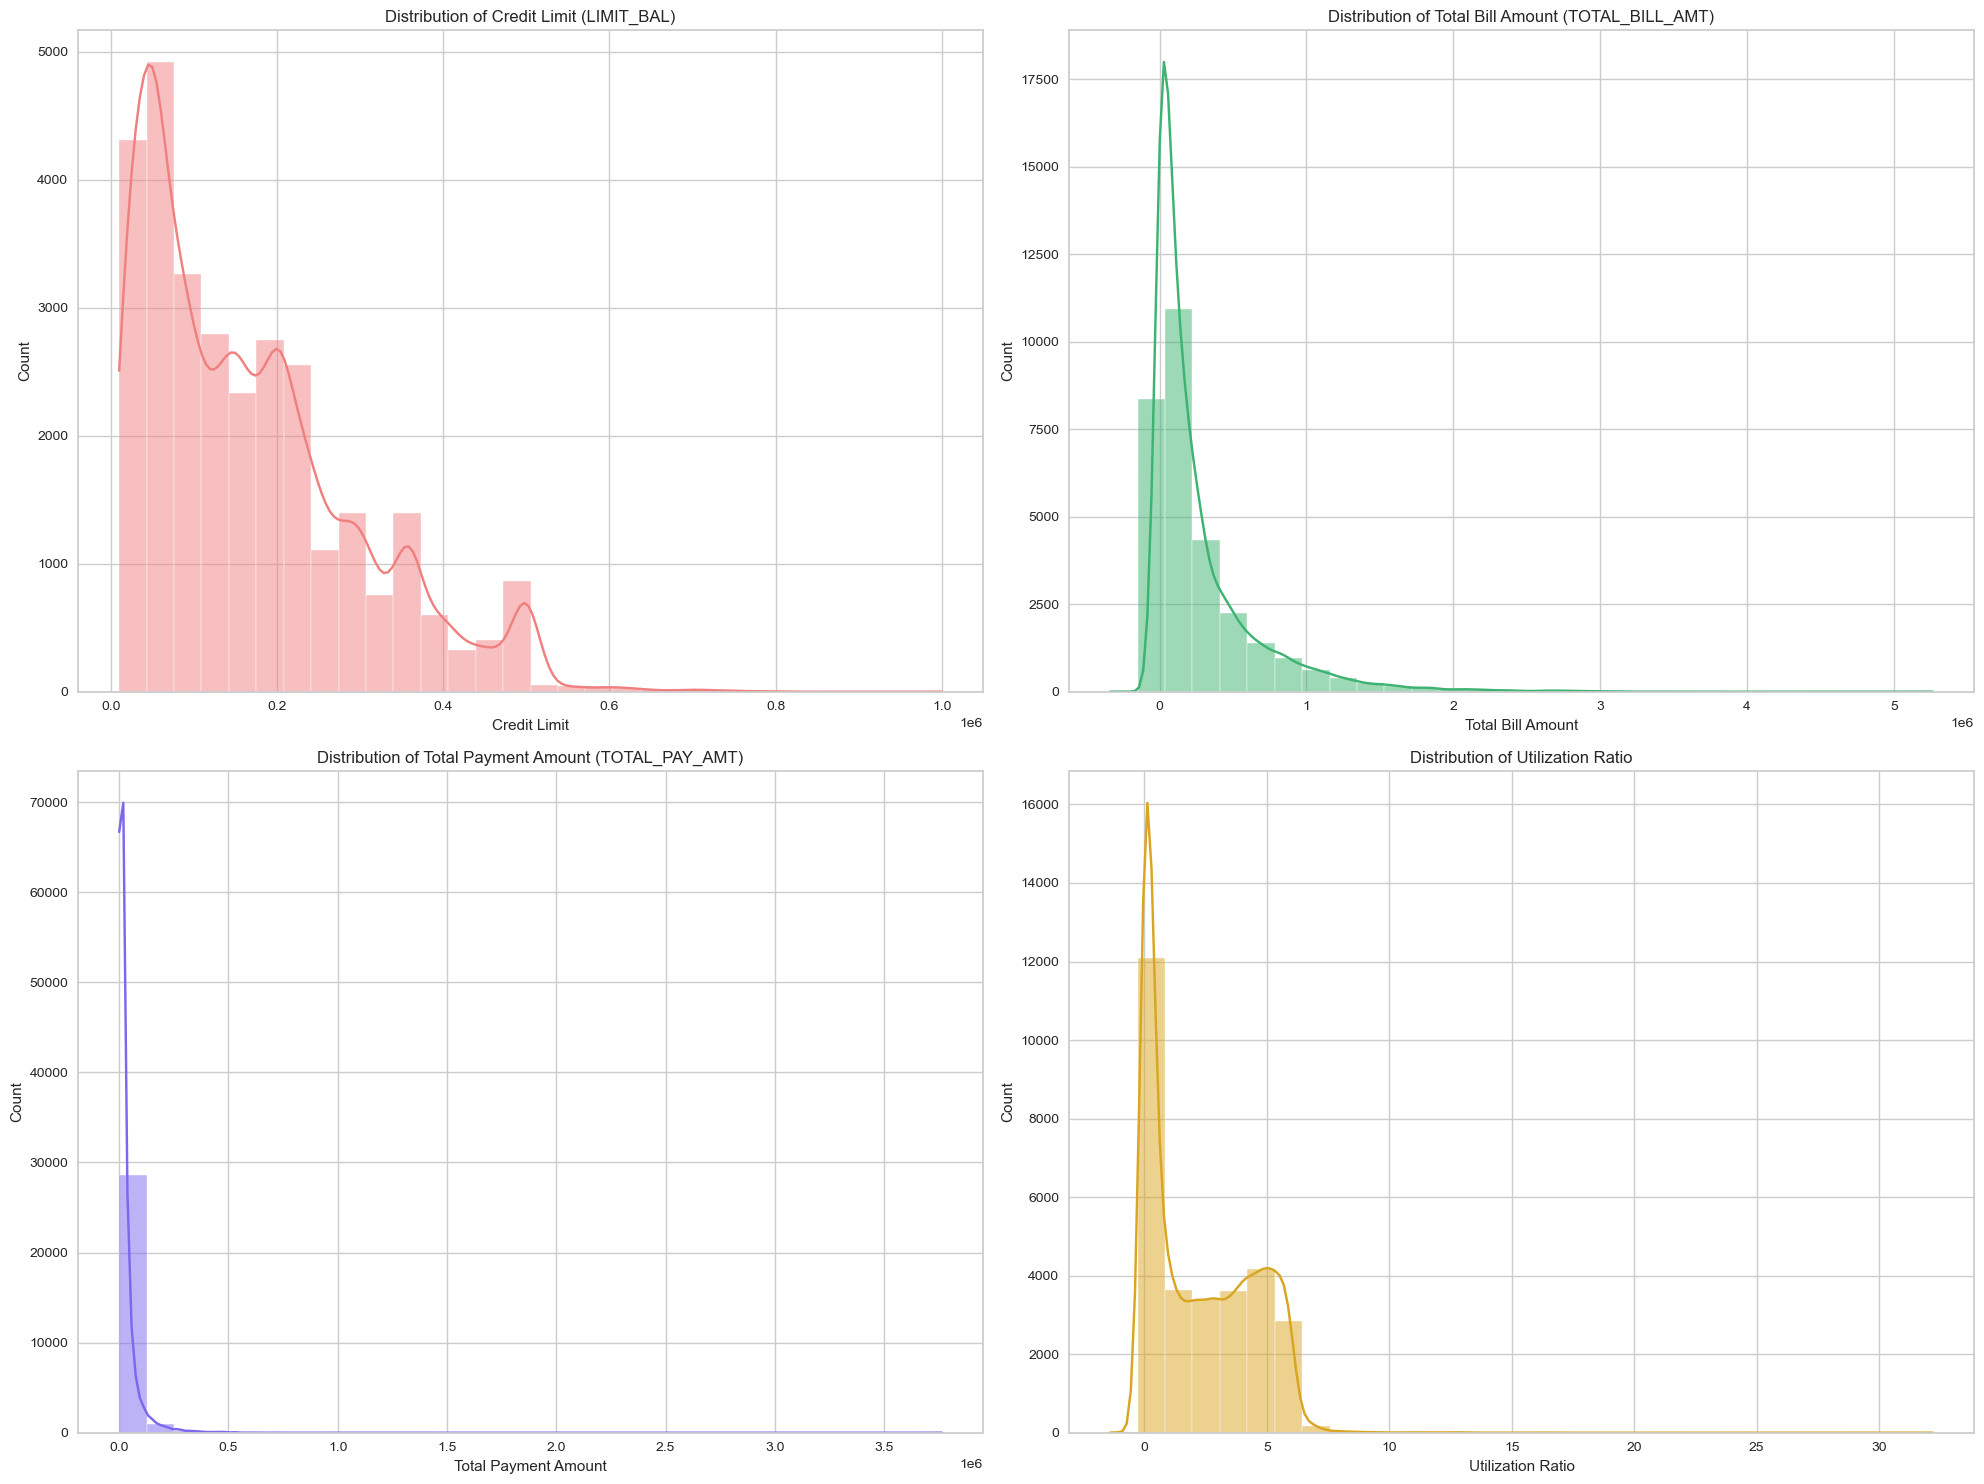

In [16]:
# Initialize the figure for distribution analysis
plt.figure(figsize=(20, 15))

# Subplot for Distribution of LIMIT_BAL
plt.subplot(2, 2, 1)
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, color="lightcoral")
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Count')

# Subplot for Distribution of TOTAL_BILL_AMT
plt.subplot(2, 2, 2)
sns.histplot(df['TOTAL_BILL_AMT'], bins=30, kde=True, color="mediumseagreen")
plt.title('Distribution of Total Bill Amount (TOTAL_BILL_AMT)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Count')

# Subplot for Distribution of TOTAL_PAY_AMT
plt.subplot(2, 2, 3)
sns.histplot(df['TOTAL_PAY_AMT'], bins=30, kde=True, color="mediumslateblue")
plt.title('Distribution of Total Payment Amount (TOTAL_PAY_AMT)')
plt.xlabel('Total Payment Amount')
plt.ylabel('Count')

# Subplot for UTILIZATION_RATIO
plt.subplot(2, 2, 4)
sns.histplot(df['UTILIZATION_RATIO'], bins=30, kde=True, color="goldenrod")
plt.title('Distribution of Utilization Ratio')
plt.xlabel('Utilization Ratio')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Analyze the Payment according the month**
* The columns 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' in the UCI Credit Card dataset represent the repayment status in the past months. Here's a breakdown of what each column signifies:

- PAY_0: Repayment status in September
- PAY_2: Repayment status in August
- PAY_3: Repayment status in July
- PAY_4: Repayment status in June
- PAY_5: Repayment status in May
- PAY_6: Repayment status in April

* The naming might seem a bit off (starting with PAY_0 instead of PAY_1), but that's how it is in the original dataset.

* The values in these columns represent the number of months of delay for the payment for that particular month. Here's what the values typically mean:

- -2: No consumption that month
- -1: Paid in full
- 0: The use of revolving credit (minimum payment made, but not the full balance)
- 1: Payment delay for one month
- 2: Payment delay for two months
- ...
- 9: Payment delay for nine months and above
* So, for example, if PAY_2 has a value of 3 for a particular client, it means that the client had a payment delay of three months for their August bill.

<Figure size 2000x1500 with 0 Axes>

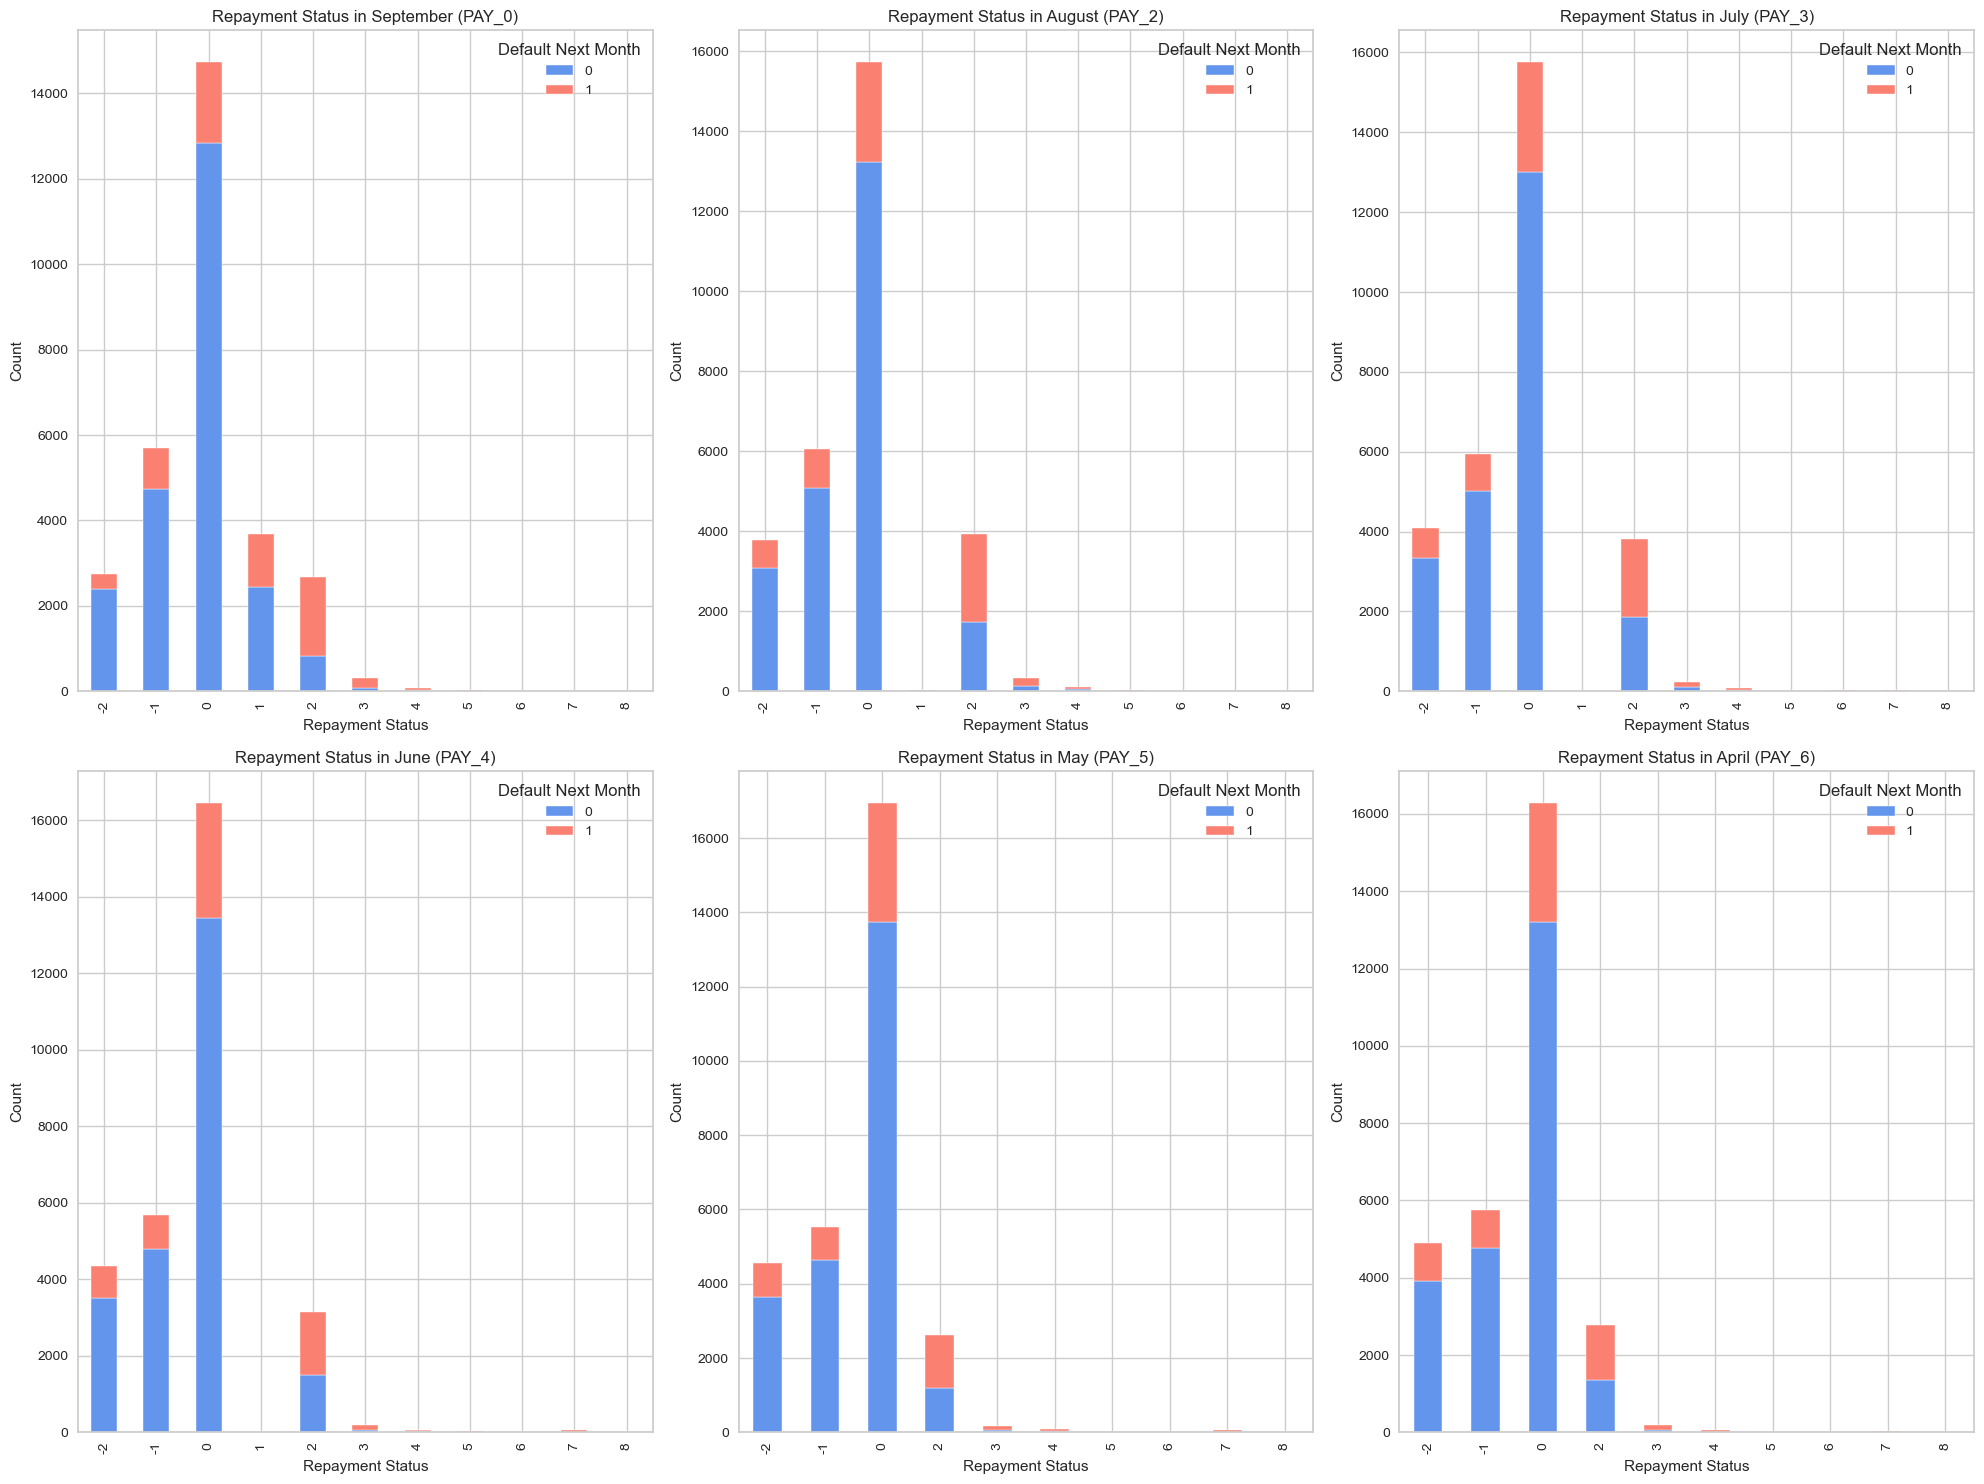

In [17]:
# Visualizing the distribution of repayment status columns
plt.figure(figsize=(20, 15))

months = ['September', 'August', 'July', 'June', 'May', 'April']
repayment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Grouping by each repayment status column and the target column to get counts
grouped_counts = {}

for col in repayment_cols:
    grouped_counts[col] = df.groupby([col, 'default.payment.next.month']).size().unstack().fillna(0)

# Visualizing the counts for repayment statuses across months for defaulters vs. non-defaulters
plt.figure(figsize=(20, 15))

for i, (month, col) in enumerate(zip(months, repayment_cols), 1):
    plt.subplot(2, 3, i)
    grouped_counts[col].plot(kind='bar', ax=plt.gca(), stacked=True, color=["cornflowerblue", "salmon"])
    plt.title(f'Repayment Status in {month} ({col})')
    plt.xlabel('Repayment Status')
    plt.ylabel('Count')
    plt.legend(title='Default Next Month')

plt.tight_layout()
plt.show()

1. Repayment Status Distributions:

- For all months, the statuses -2, -1, and 0 (which represent no consumption, paid in full, and use of revolving credit, respectively) have the highest counts. Among these, the use of revolving credit (0) is most common.
- Payment delays of one month (1) also have significant counts, particularly among defaulters.

2. Patterns Among Defaulters:

- As the repayment delay increases (values 2 and above), the counts decrease, but these delayed payments are more common among defaulters.
- The patterns remain relatively consistent across months. This suggests that clients who have had payment delays in the past are more likely to default the next month.

3. Month-to-Month Consistency:

- The repayment behavior appears consistent from month to month. This suggests that clients' repayment habits are relatively stable over this six-month period.
- These visualizations emphasize the importance of past repayment behavior as a predictor of future default risk. Clients with payment delays (even if just for a month) are at a higher risk of defaulting the next month compared to those who pay in full or use revolving credit

In [18]:
# data cleaning
# Renaming the 'default.payment.next.month' column to 'will_default'
df.rename(columns={'default.payment.next.month': 'will_default'}, inplace=True)
# Renaming 'Pay_0' -> 'Pay_1'
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
# Drop 'ID' column
df.drop(columns='ID', axis=1, inplace=True)

In [19]:
# Setting the display option to show all columns
pd.set_option('display.max_columns', None)

# Displaying the first few rows of the dataset to show all columns
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,will_default,TOTAL_BILL_AMT,TOTAL_PAY_AMT,UTILIZATION_RATIO
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.39
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.14
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,1.13
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,4.63
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,2.19


In [20]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [21]:
# Renaming the categories in the EDUCATION column
df['EDUCATION'].replace({0: 4, 5: 4, 6: 4}, inplace=True)

# Verifying the changes
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [22]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [23]:
# Renaming the categories in the MARRIAGE column
df['MARRIAGE'].replace({0: 3}, inplace=True)

# Verifying the changes
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [24]:
# Feature Engineering
# 1. Age Binning
bins = [20, 35, 50, 80]
labels = ['Young', 'Middle-Aged', 'Senior']
df['age_group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# 2. Calculating the Average Credit Utilization
df['avg_credit_utilization'] = df['TOTAL_BILL_AMT'] / (df['LIMIT_BAL'] * 6)
 
# 3. Calculating the Overall Payment to Bill Ratio
df['overall_payment_to_bill_ratio'] = df['TOTAL_PAY_AMT'] / (df['TOTAL_BILL_AMT'] + 1)

# 3. Trend in Payment Status (using diff for simplicity, more complex patterns can be examined)
df['payment_trend'] = df['PAY_1'] - df['PAY_6']

# 3. Consistency in Payments (number of months with no delay)
df['consistent_payments'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: sum(x <= 0), axis=1)

# 4. Total Delayed Months
df['total_delayed_months'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: sum(x > 0), axis=1)


In [25]:
# Feature Importance
# Correlation Analysis with the target variable 'will_default'
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[float, int])

# Calculating correlation with the target variable 'will_default'
correlation_with_target = numeric_df.corr()['will_default'].sort_values(ascending=False)
correlation_with_target

will_default                     1.000000
total_delayed_months             0.398394
PAY_1                            0.324794
PAY_2                            0.263551
PAY_3                            0.235253
PAY_4                            0.216614
PAY_5                            0.204149
PAY_6                            0.186866
payment_trend                    0.128774
avg_credit_utilization           0.115483
UTILIZATION_RATIO                0.115480
EDUCATION                        0.033842
AGE                              0.013890
BILL_AMT6                       -0.005372
BILL_AMT5                       -0.006760
overall_payment_to_bill_ratio   -0.006892
BILL_AMT4                       -0.010156
TOTAL_BILL_AMT                  -0.012691
BILL_AMT3                       -0.014076
BILL_AMT2                       -0.014193
BILL_AMT1                       -0.019644
MARRIAGE                        -0.027575
SEX                             -0.039961
PAY_AMT6                        -0

* Here's the correlation of each numeric feature with the target variable, will_default:

- Features closer to 1 or -1 have a stronger linear relationship with the target variable.
- Positive values indicate that as the feature value increases, the likelihood of defaulting (will_default=1) also increases.
- Negative values indicate that as the feature value increases, the likelihood of not defaulting (will_default=0) increases.

For example:

- `total_delayed_months` has a strong positive correlation, suggesting clients with more months of delayed payments are more likely to default.
- `LIMIT_BA`L (amount of given credit) has a negative correlation, indicating clients with higher credit limits are less likely to default.

In [26]:
import scipy.stats as stats

# Function to perform ANOVA analysis
def anova_analysis(data, cat_variable, target='will_default'):
    categories = data[cat_variable].unique()
    return stats.f_oneway(*[data[data[cat_variable] == category][target] for category in categories])

# Performing ANOVA for categorical variables
anova_results = {}
categorical_vars = ['EDUCATION', 'SEX', 'MARRIAGE', 'age_group']

for var in categorical_vars:
    f_stat, p_value = anova_analysis(df, var)
    anova_results[var] = {'F-statistic': f_stat, 'p-value': p_value}

anova_results_df = pd.DataFrame(anova_results).T
anova_results_df

,F-statistic,p-value
EDUCATION,53.750257,1.218503e-34
SEX,47.978854,4.395249e-12
MARRIAGE,14.076955,7.750382e-07
age_group,9.810684,5.503856e-05


Here are the ANOVA results for the categorical variables:

- F-statistic: Represents the variation between sample group means divided by the variation within sample group. A larger F-statistic suggests that there's a significant difference between the groups.

- p-value: Represents the probability that the observed difference is due to random chance. A smaller p-value (typically less than 0.05) suggests that the observed difference is statistically significant.

From the results:

- `EDUCATION`: Has a very low p-value, suggesting that different education levels have statistically significant differences in default rates.
- `SEX`: Also has a very low p-value, indicating statistically significant differences in default rates between genders.
- `MARRIAGE`: The p-value is low, implying statistically significant differences in default rates based on marital status.
- `age_group`: The p-value is low, suggesting that the default rates vary significantly across age groups.

From the provided correlation analysis:

Features like BILL_AMT6, BILL_AMT5, overall_payment_to_bill_ratio, payment_to_bill_ratio_1, payment_to_bill_ratio_5, BILL_AMT4, payment_to_bill_ratio_3, payment_to_bill_ratio_4, BILL_AMT3, BILL_AMT2, payment_to_bill_ratio_2, and BILL_AMT1 have low absolute correlation values with the target variable. This might indicate that the individual bill amounts and some of the payment to bill ratios for certain months might not be as informative for predicting default in a linear context.

In [27]:
df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
               'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'overall_payment_to_bill_ratio'],
       axis=1, inplace=True)

In [28]:
# Feature encoding
# Mapping age groups to numeric values
age_group_mapping = {'Young': 1, 'Middle-Aged': 2, 'Senior': 3}
df['age_group'] = df['age_group'].map(age_group_mapping)

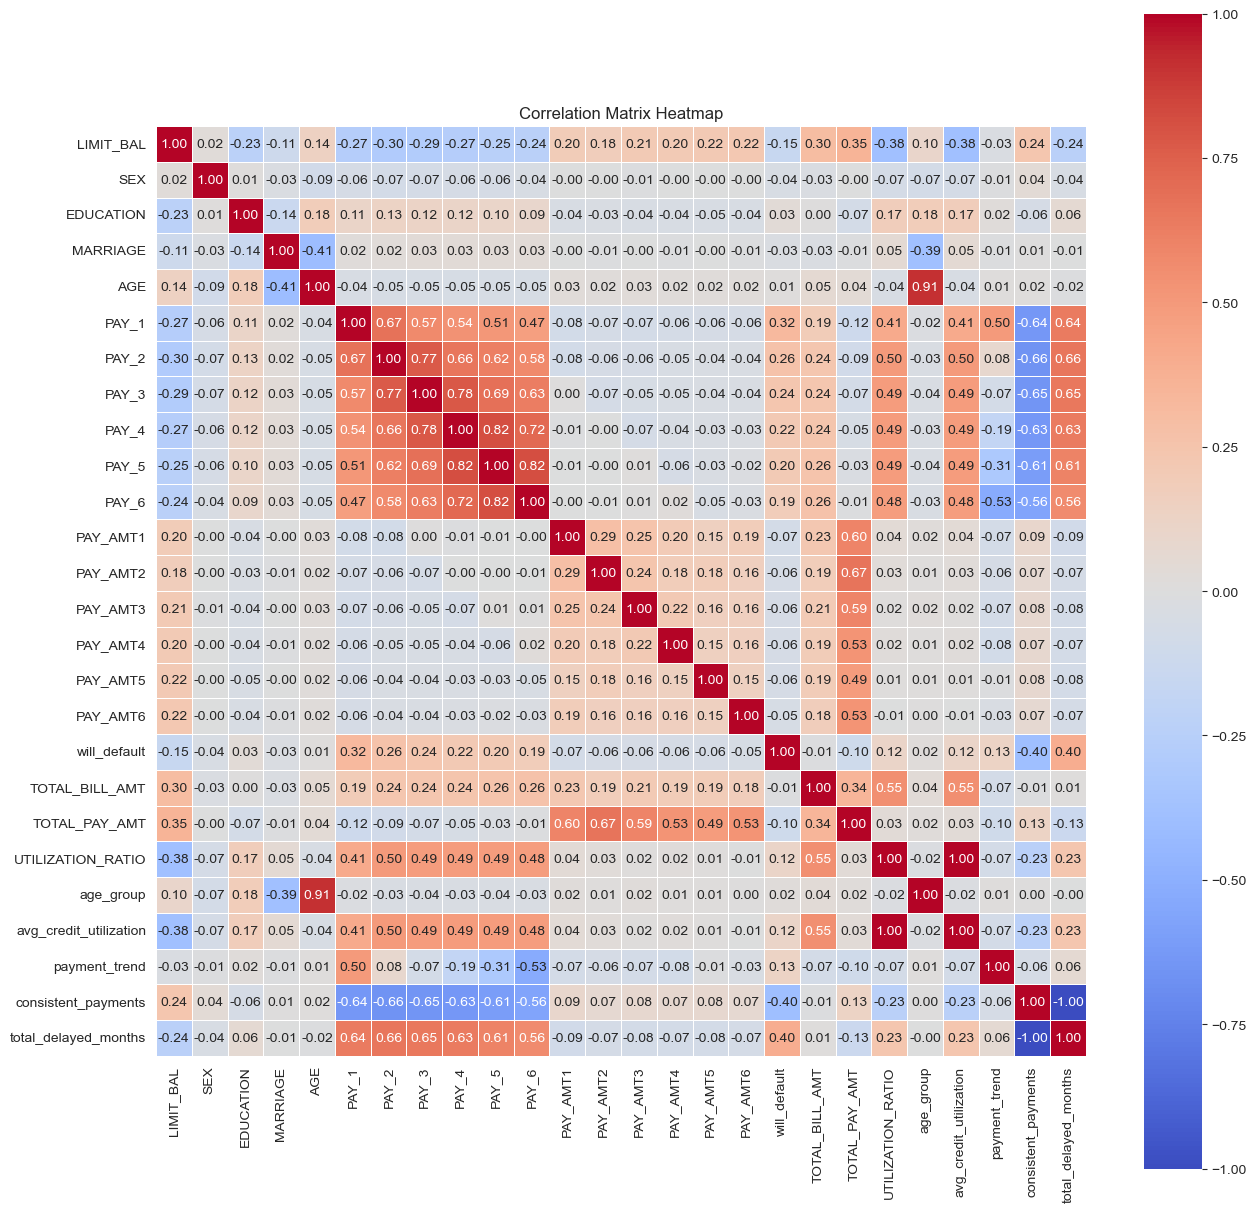

In [116]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")

plt.show()


In [29]:
# drop columns
df.drop(columns=['consistent_payments', 'TOTAL_PAY_AMT','TOTAL_BILL_AMT', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3',
   'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARRIAGE', 'SEX'], axis=1, inplace=True)


In [30]:
df['will_default'].value_counts()

0    23364
1     6636
Name: will_default, dtype: int64

In [31]:
# Model Training
ros = RandomOverSampler()
# clf = ClassificationExperiment
clf = setup(data = df, target = 'will_default', fix_imbalance=True, fix_imbalance_method=ros, session_id = 123)


,Description,Value
0,Session id,123
1,Target,will_default
2,Target type,Binary
3,Original data shape,"(30000, 15)"
4,Transformed data shape,"(41710, 17)"
5,Transformed train set shape,"(32710, 17)"
6,Transformed test set shape,"(9000, 17)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [32]:
best = clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7930,0.7192,0.3615,0.5490,0.4358,0.3156,0.3260,1.8580
rf,Random Forest Classifier,0.7880,0.7355,0.4418,0.5248,0.4796,0.3477,0.3498,2.5740
lr,Logistic Regression,0.7788,0.6179,0.0000,0.0000,0.0000,0.0000,0.0000,0.6030
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1200
ridge,Ridge Classifier,0.7702,0.0000,0.5640,0.4834,0.5204,0.3706,0.3726,0.1420
lda,Linear Discriminant Analysis,0.7701,0.7494,0.5656,0.4834,0.5210,0.3711,0.3732,0.1890
lightgbm,Light Gradient Boosting Machine,0.7632,0.7698,0.6062,0.4729,0.5312,0.3760,0.3813,0.6310
gbc,Gradient Boosting Classifier,0.7575,0.7780,0.6278,0.4646,0.5338,0.3749,0.3828,3.0400
ada,Ada Boost Classifier,0.7574,0.7711,0.6252,0.4641,0.5326,0.3736,0.3813,0.9790
nb,Naive Bayes,0.7564,0.7002,0.5020,0.4546,0.4768,0.3187,0.3195,0.1410


In [33]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [34]:
tune_model = clf.tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7781,0.7708,0.6034,0.4982,0.5458,0.4008,0.4040
1,0.7914,0.7668,0.5733,0.5257,0.5485,0.4132,0.4138
2,0.7833,0.7612,0.5754,0.5086,0.5399,0.3989,0.4002
3,0.7710,0.7277,0.4978,0.4823,0.4899,0.3423,0.3424
4,0.7852,0.7641,0.5841,0.5123,0.5458,0.4060,0.4075
5,0.7814,0.7717,0.5742,0.5057,0.5378,0.3954,0.3968
6,0.7771,0.7505,0.5548,0.4971,0.5244,0.3794,0.3804
7,0.7952,0.7728,0.6215,0.5322,0.5734,0.4398,0.4420
8,0.7829,0.7608,0.5505,0.5089,0.5289,0.3881,0.3886


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
tune_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [36]:
final_model = clf.finalize_model(estimator = tune_model) # best performing model

In [37]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'EDUCATION', 'AGE',
                                             'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
                                             'PAY_5', 'PAY_6',
                                             'UTILIZATION_RATIO',
                                             'avg_credit_utilization',
                                             'payment_trend',
                                             'total_delayed_months'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_emp...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [38]:
clf.save_model(model = final_model, model_name='classifier') # save model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'EDUCATION', 'AGE',
                                              'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
                                              'PAY_5', 'PAY_6',
                                              'UTILIZATION_RATIO',
                                              'avg_credit_utilization',
                                              'payment_trend',
                                              'total_delayed_months'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_emp...
                  ExtraTreesClassifier(bootstrap=False, ccp

In [39]:
import os

def get_file_size(file_path):
  # Check if the file exists
  if os.path.exists(file_path):
      # Get the size of the file in bytes
      file_size = os.path.getsize(file_path)
      # Convert to a more human-readable format (e.g., kilobytes or megabytes)
      if file_size < 1024:
          size_str = f"{file_size} bytes"
      elif 1024 <= file_size < 1024**2:
          size_str = f"{file_size/1024:.2f} KB"
      else:
          size_str = f"{file_size/1024**2:.2f} MB"

      print(f"The size of '{file_path}' is approximately {size_str}")
  else:
      print(f"'{file_path}' does not exist.")

print(get_file_size('classifier.pkl'))

The size of 'classifier.pkl' is approximately 191.09 MB
None


In [47]:
# df.to_csv("preprocessed_data.csv")

In [40]:
# Load model
load_model = clf.load_model('classifier')

Transformation Pipeline and Model Successfully Loaded


In [53]:
custom_array = np.array([
    [1500, 3, 21, 3, 3, 0, -1, -2, -2, 0.4, 1, 0.3, 2,1 ],
    [2000, 4, 25, -2, 2, 0, 0, 0, 0, 0.01, 3, 0.04, 3, 2],
    [15000, 1, 54, 2, -1, -1, -3, -3, -4, 0.78, 4, 0.98, 4, 1],
    [53522, 1, 36, -2, -2, -1, 0, 4, 3, 0.01, 3, 0.01, 3, 0],
    [728235, 1, 61, -2, -2, -2, -2, -2, -4, 0.93, 5, 0.63, 4, 4]
    
])
custom_data_df = pd.DataFrame(custom_array, columns=["LIMIT_BAL", "EDUCATION", "AGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6","UTILIZATION_RATIO", "age_group", "avg_credit_utilization", "payment_trend", "total_delayed_months"])

In [54]:
custom_data_df

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,UTILIZATION_RATIO,age_group,avg_credit_utilization,payment_trend,total_delayed_months
0,1500.0,3.0,21.0,3.0,3.0,0.0,-1.0,-2.0,-2.0,0.40,1.0,0.30,2.0,1.0
1,2000.0,4.0,25.0,-2.0,2.0,0.0,0.0,0.0,0.0,0.01,3.0,0.04,3.0,2.0
2,15000.0,1.0,54.0,2.0,-1.0,-1.0,-3.0,-3.0,-4.0,0.78,4.0,0.98,4.0,1.0
3,53522.0,1.0,36.0,-2.0,-2.0,-1.0,0.0,4.0,3.0,0.01,3.0,0.01,3.0,0.0
4,728235.0,1.0,61.0,-2.0,-2.0,-2.0,-2.0,-2.0,-4.0,0.93,5.0,0.63,4.0,4.0


In [55]:
predictions = clf.predict_model(load_model, data=custom_data_df)

In [56]:
predictions

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,UTILIZATION_RATIO,age_group,avg_credit_utilization,payment_trend,total_delayed_months,prediction_label,prediction_score
0,1500.0,3.0,21.0,3.0,3.0,0.0,-1.0,-2.0,-2.0,0.40,1.0,0.30,2.0,1.0,1,0.5500
1,2000.0,4.0,25.0,-2.0,2.0,0.0,0.0,0.0,0.0,0.01,3.0,0.04,3.0,2.0,0,0.7700
2,15000.0,1.0,54.0,2.0,-1.0,-1.0,-3.0,-3.0,-4.0,0.78,4.0,0.98,4.0,1.0,1,0.6200
3,53522.0,1.0,36.0,-2.0,-2.0,-1.0,0.0,4.0,3.0,0.01,3.0,0.01,3.0,0.0,0,0.7900
4,728235.0,1.0,61.0,-2.0,-2.0,-2.0,-2.0,-2.0,-4.0,0.93,5.0,0.63,4.0,4.0,0,0.5438


In [68]:
import joblib
joblib.dump(final_model, "model_compressed.pkl", compress=("gzip", 3))

['model_compressed.pkl']

In [65]:
compressed_model = joblib.load("model_compressed.pkl")

In [66]:
compressed_model_predictions = clf.predict_model(compressed_model, data=custom_data_df)

In [67]:
predictions

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,UTILIZATION_RATIO,age_group,avg_credit_utilization,payment_trend,total_delayed_months,prediction_label,prediction_score
0,1500.0,3.0,21.0,3.0,3.0,0.0,-1.0,-2.0,-2.0,0.40,1.0,0.30,2.0,1.0,1,0.5500
1,2000.0,4.0,25.0,-2.0,2.0,0.0,0.0,0.0,0.0,0.01,3.0,0.04,3.0,2.0,0,0.7700
2,15000.0,1.0,54.0,2.0,-1.0,-1.0,-3.0,-3.0,-4.0,0.78,4.0,0.98,4.0,1.0,1,0.6200
3,53522.0,1.0,36.0,-2.0,-2.0,-1.0,0.0,4.0,3.0,0.01,3.0,0.01,3.0,0.0,0,0.7900
4,728235.0,1.0,61.0,-2.0,-2.0,-2.0,-2.0,-2.0,-4.0,0.93,5.0,0.63,4.0,4.0,0,0.5438
